<a href="https://colab.research.google.com/github/parky-sood/Brain-Tumor-Classifier/blob/main/BrainTumorClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 85% 127M/149M [00:00<00:00, 228MB/s]
100% 149M/149M [00:00<00:00, 198MB/s]


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create dataframe with collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

Class Path    Class
0     /content/Training/notumor/Tr-no_0794.jpg  notumor
1     /content/Training/notumor/Tr-no_1039.jpg  notumor
2     /content/Training/notumor/Tr-no_0972.jpg  notumor
3     /content/Training/notumor/Tr-no_0559.jpg  notumor
4     /content/Training/notumor/Tr-no_1252.jpg  notumor
...                                        ...      ...
5707   /content/Training/glioma/Tr-gl_0255.jpg   glioma
5708   /content/Training/glioma/Tr-gl_0182.jpg   glioma
5709   /content/Training/glioma/Tr-gl_0553.jpg   glioma
5710   /content/Training/glioma/Tr-gl_0380.jpg   glioma
5711   /content/Training/glioma/Tr-gl_0286.jpg   glioma

[5712 rows x 2 columns]

In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

Class Path    Class
0       /content/Testing/notumor/Te-no_0097.jpg  notumor
1       /content/Testing/notumor/Te-no_0301.jpg  notumor
2     /content/Testing/notumor/Te-noTr_0000.jpg  notumor
3       /content/Testing/notumor/Te-no_0222.jpg  notumor
4       /content/Testing/notumor/Te-no_0139.jpg  notumor
...                                         ...      ...
1306     /content/Testing/glioma/Te-gl_0280.jpg   glioma
1307     /content/Testing/glioma/Te-gl_0163.jpg   glioma
1308     /content/Testing/glioma/Te-gl_0194.jpg   glioma
1309     /content/Testing/glioma/Te-gl_0146.jpg   glioma
1310     /content/Testing/glioma/Te-gl_0224.jpg   glioma

[1311 rows x 2 columns]

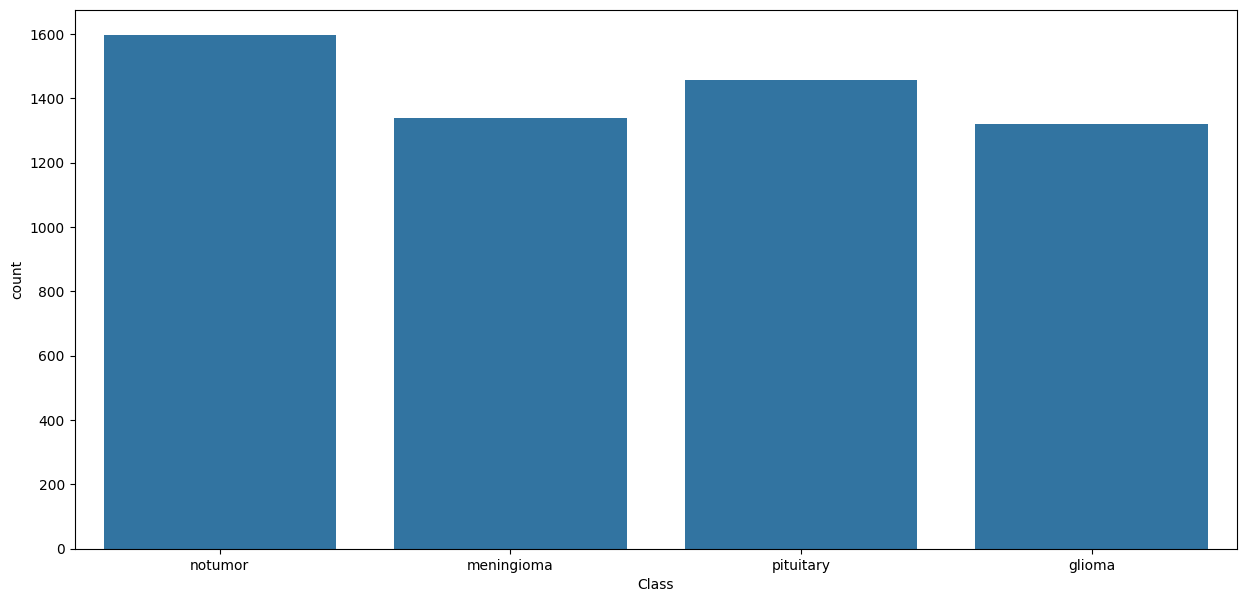

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class']);

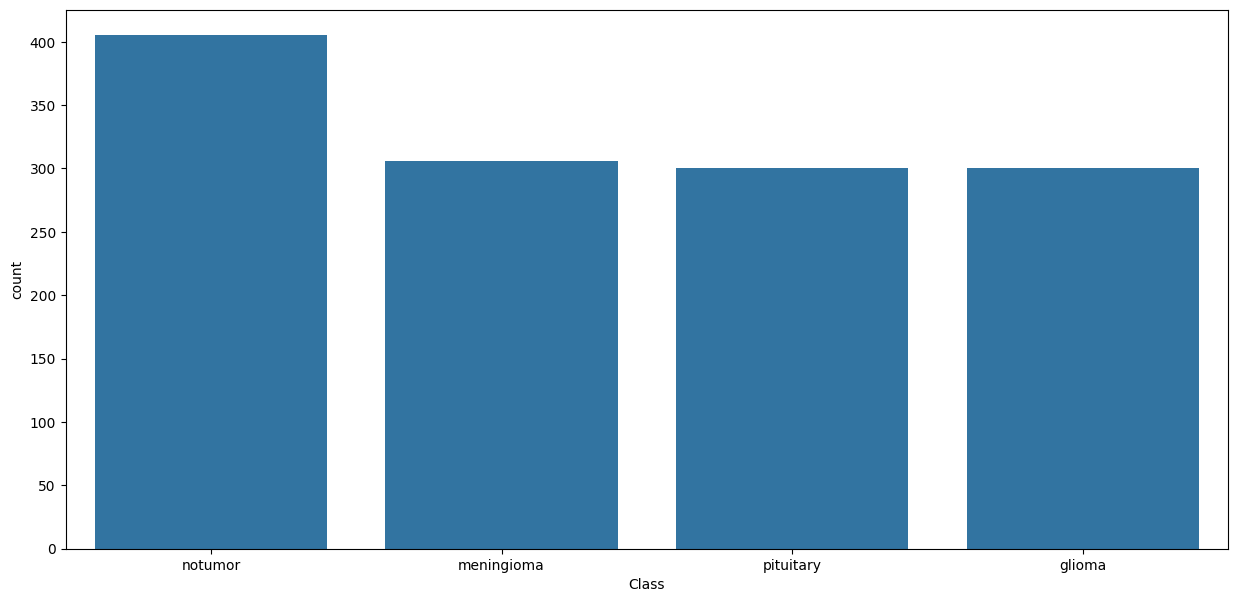

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class']);

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [12]:
valid_df

Class Path       Class
118      /content/Testing/notumor/Te-no_0317.jpg     notumor
53       /content/Testing/notumor/Te-no_0238.jpg     notumor
171      /content/Testing/notumor/Te-no_0210.jpg     notumor
767    /content/Testing/pituitary/Te-pi_0146.jpg   pituitary
1078      /content/Testing/glioma/Te-gl_0281.jpg      glioma
...                                          ...         ...
312      /content/Testing/notumor/Te-no_0078.jpg     notumor
531   /content/Testing/meningioma/Te-me_0081.jpg  meningioma
535   /content/Testing/meningioma/Te-me_0087.jpg  meningioma
96       /content/Testing/notumor/Te-no_0124.jpg     notumor
87       /content/Testing/notumor/Te-no_0400.jpg     notumor

[655 rows x 2 columns]

In [13]:
ts_df

Class Path       Class
490   /content/Testing/meningioma/Te-me_0134.jpg  meningioma
1185    /content/Testing/glioma/Te-glTr_0009.jpg      glioma
355      /content/Testing/notumor/Te-no_0087.jpg     notumor
966    /content/Testing/pituitary/Te-pi_0098.jpg   pituitary
99       /content/Testing/notumor/Te-no_0029.jpg     notumor
...                                          ...         ...
944    /content/Testing/pituitary/Te-pi_0263.jpg   pituitary
479   /content/Testing/meningioma/Te-me_0121.jpg  meningioma
717    /content/Testing/pituitary/Te-pi_0282.jpg   pituitary
644   /content/Testing/meningioma/Te-me_0028.jpg  meningioma
39       /content/Testing/notumor/Te-no_0349.jpg     notumor

[656 rows x 2 columns]

In [14]:
batch_size = 32 # 16,32,64,128 are commonly used

img_size = (299,299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [15]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path", y_col="Class", batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


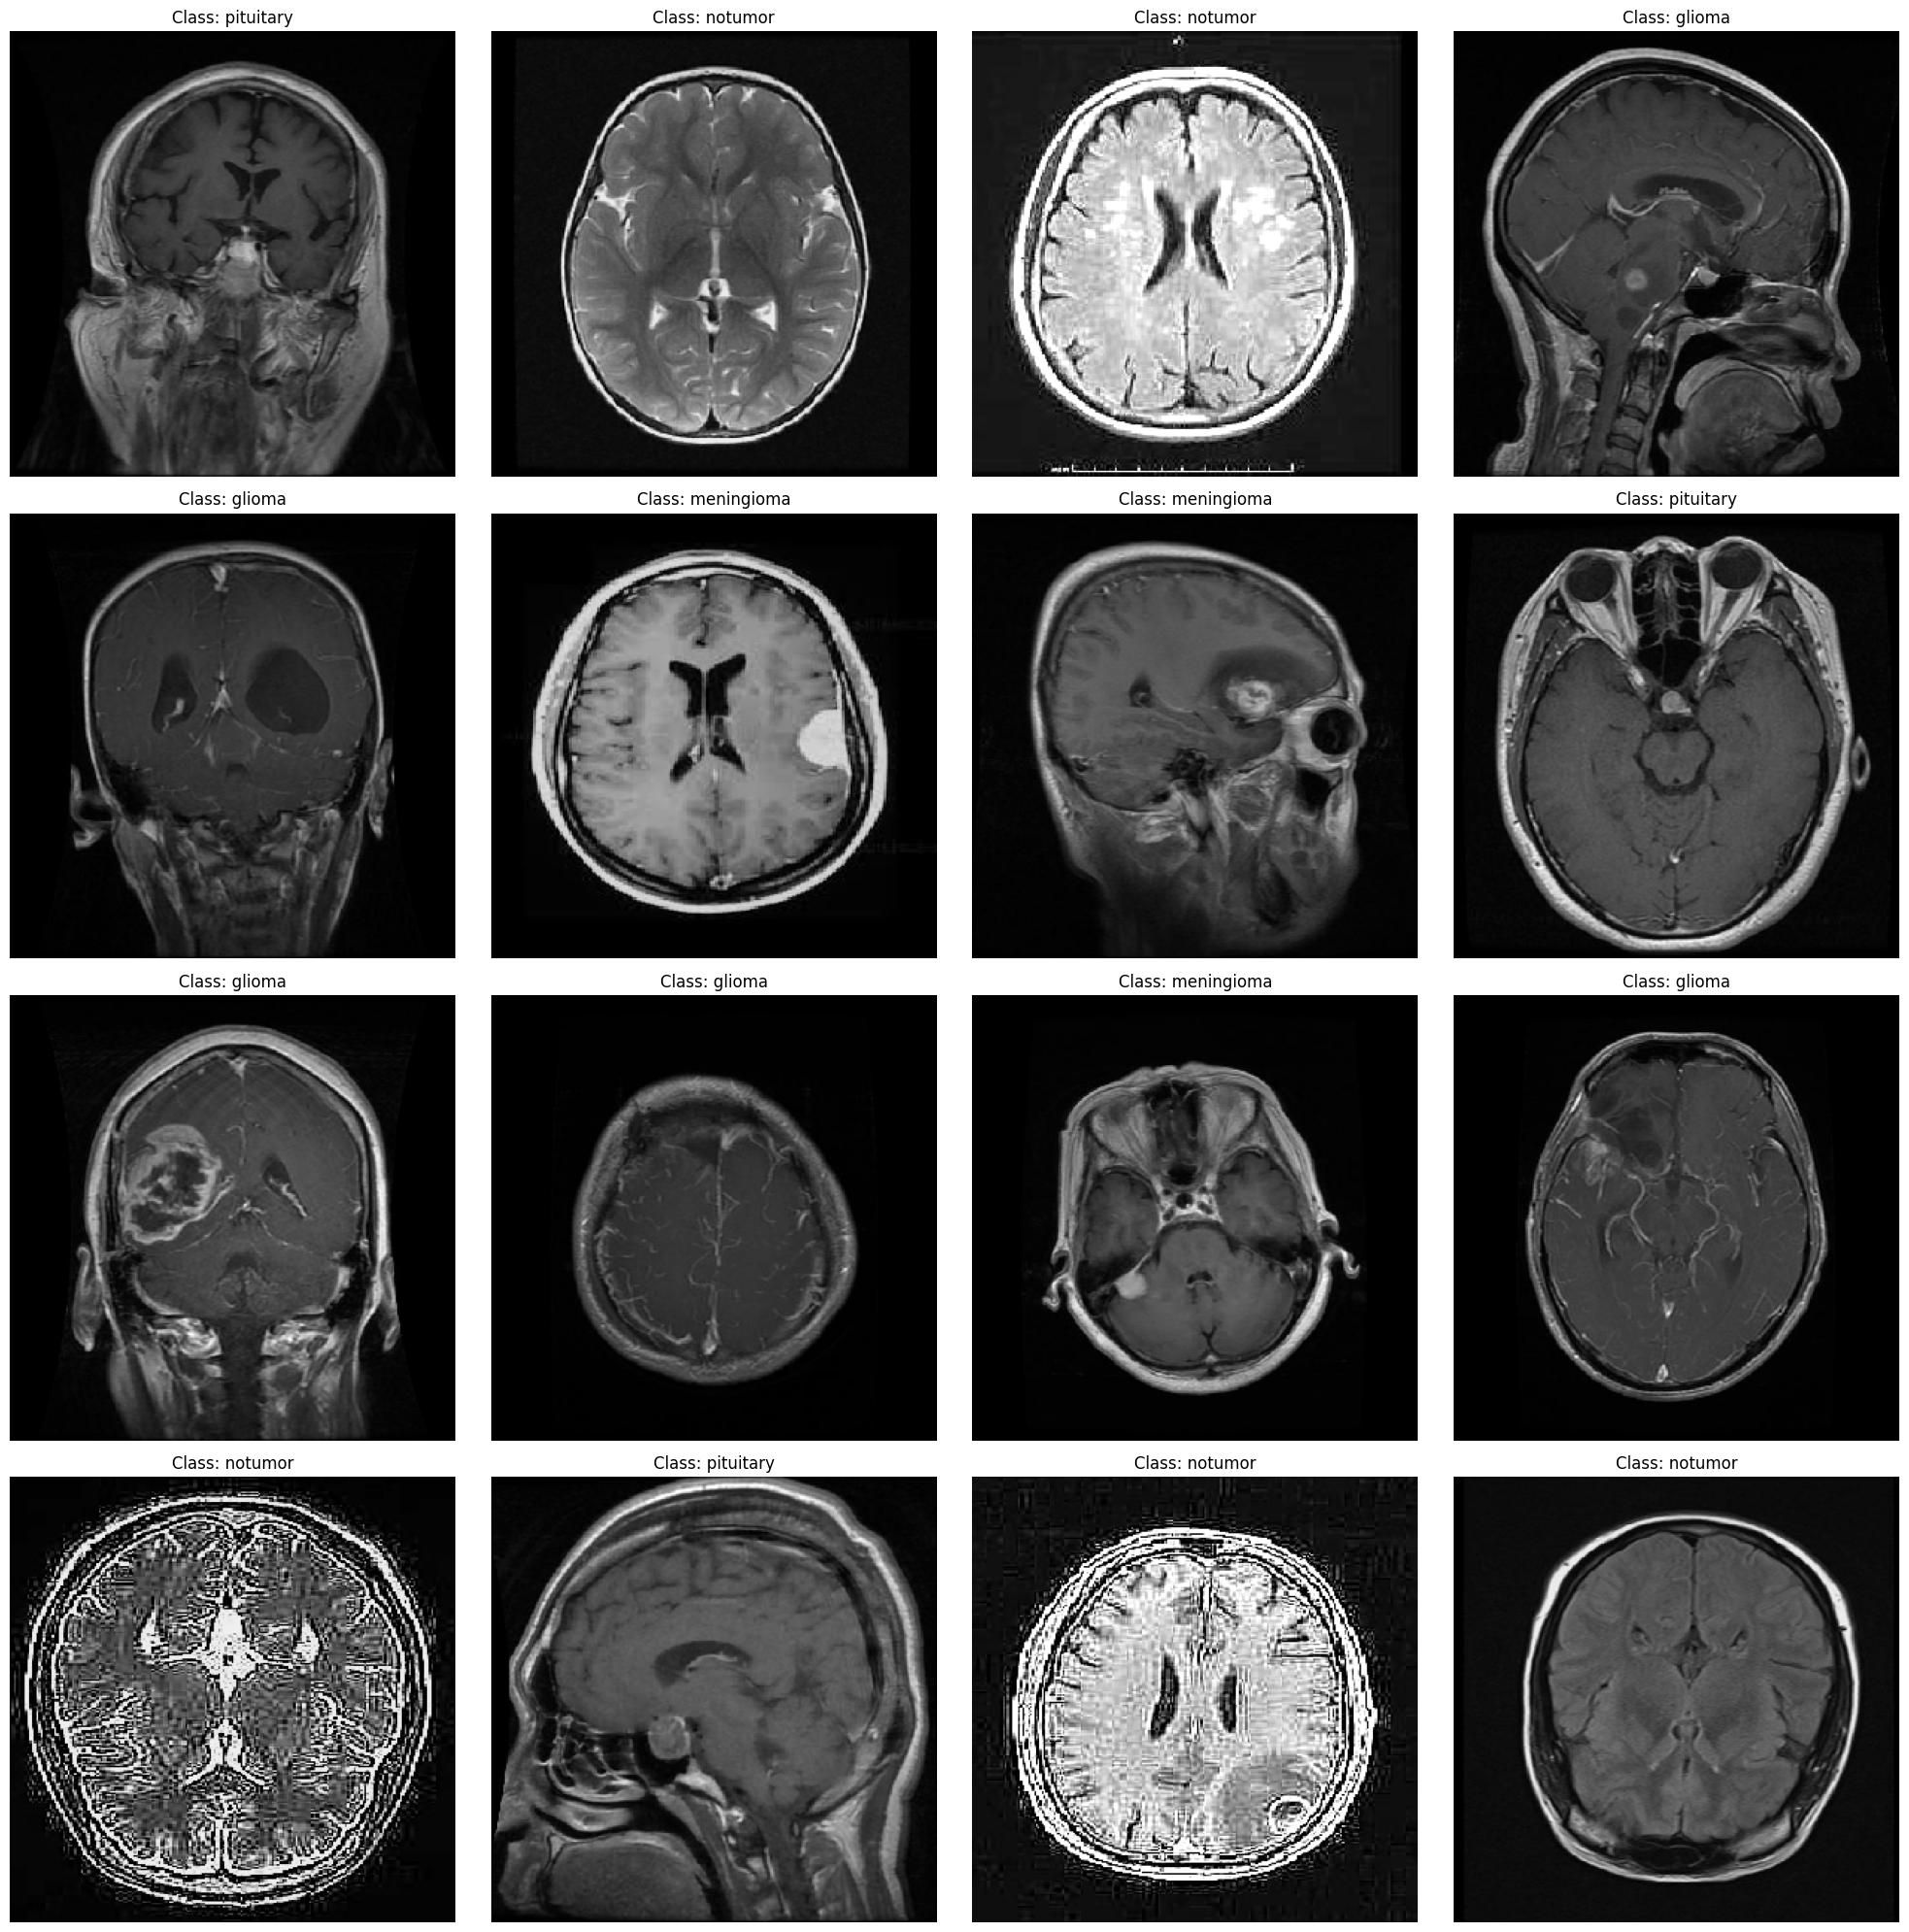

In [16]:
plt.figure(figsize=(20,20))

for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get class index
  class_index = np.argmax(label)

  # Get list of class names and indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find index of class index in list of indices
  index_position = class_indices.index(class_index)

  # Get class name using index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis("off")

plt.tight_layout()
plt.show()

In [17]:
# Back Propogation

In [18]:
img_shape = (299,299,3) # 3 for RGB (3 color channels)

# Xception model
base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling="max")

# Sequential model
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation="relu"),
    Dropout(rate=0.25),
    Dense(4,activation="softmax")   # softmax transforms probability distribution from prev layer into distribution that adds to 1
])



83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [19]:
model.compile(Adamax(learning_rate=0.001),        # low learning rate => model learns more slowly but more accurately (takes smaller steps while learning)
              loss="categorical_crossentropy",    # penalizes model for bad predictions, helps it learn to make beter predictions
              metrics=["accuracy",
                       Precision(),
                       Recall()])

In [20]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 105s 324ms/step - accuracy: 0.7632 - loss: 0.6795 - precision: 0.8369 - recall: 0.6624 - val_accuracy: 0.8687 - val_loss: 0.3475 - val_precision: 0.8684 - val_recall: 0.8565
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 159ms/step - accuracy: 0.9756 - loss: 0.0701 - precision: 0.9771 - recall: 0.9751 - val_accuracy: 0.8519 - val_loss: 0.4329 - val_precision: 0.8670 - val_recall: 0.8458
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 161ms/step - accuracy: 0.9940 - loss: 0.0220 - precision: 0.9941 - recall: 0.9934 - val_accuracy: 0.9802 - val_loss: 0.0665 - val_precision: 0.9801 - val_recall: 0.9786
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 162ms/step - accuracy: 0.9966 - loss: 0.0128 - precision: 0.9967 - recall: 0.9966 - val_accuracy: 0.9817 - val_loss: 0.0733 - val_precision: 0.9817 - val_recall: 0.9817
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 161ms/step - accuracy: 0.9967 - loss: 0.0120 - precision: 0.9968 - recall: 0.9967 - val_accuracy: 0.9817 - val_loss: 0

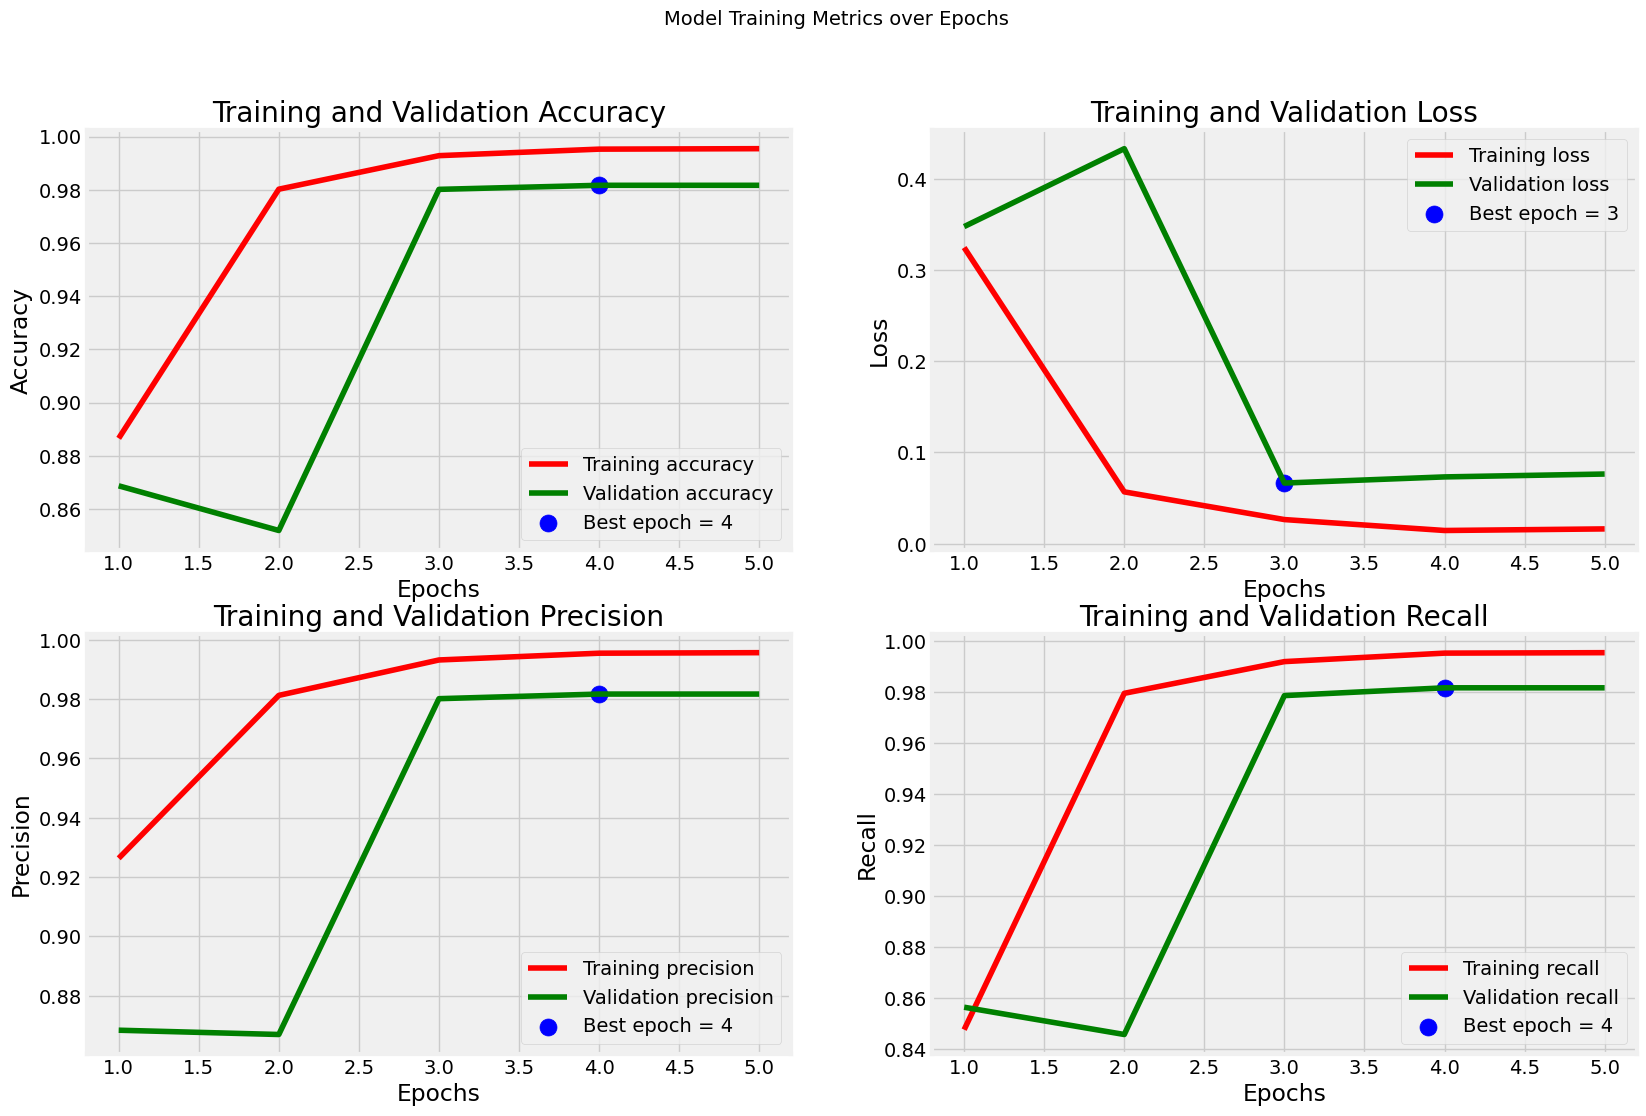

In [21]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Model Training Metrics over Epochs", fontsize=14)
plt.show()

In [22]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 157ms/step - accuracy: 0.9984 - loss: 0.0046 - precision: 0.9984 - recall: 0.9984
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9835 - loss: 0.0656 - precision: 0.9835 - recall: 0.9835
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 0.0029 - precision: 1.0000 - recall: 1.0000    

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9889 - loss: 0.0328 - precision: 0.9889 - recall: 0.9889
Train Accuracy: 99.84%
Train Loss: 0.0048


Validation Accuracy: 98.32%
Validation Loss: 0.0670


Test Accuracy: 98.93%
Test Loss: 0.0340


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


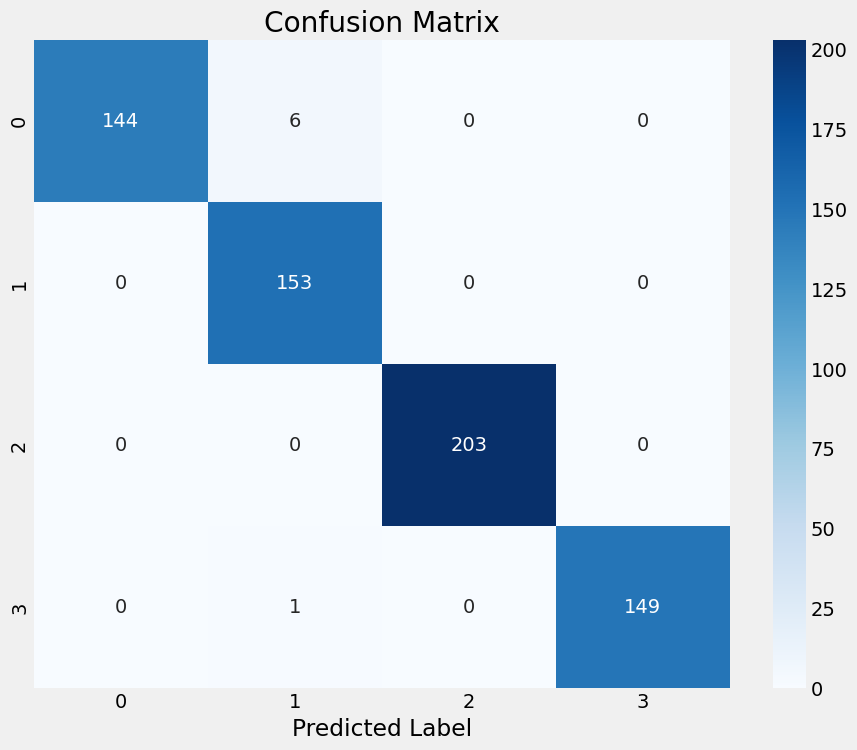

In [23]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Confusion matrix from scikit-learn
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from PIL import Image

def predict(img_path: str) -> None:
  labels = list(class_dict.keys())

  plt.figure(figsize=(6,8))

  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  plt.subplot(2,1,2)
  bars = plt.barh(labels, probabilities)

  plt.xlabel("Probability", fontsize=15)
  plt.ylabel("Class Probabilities")

  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


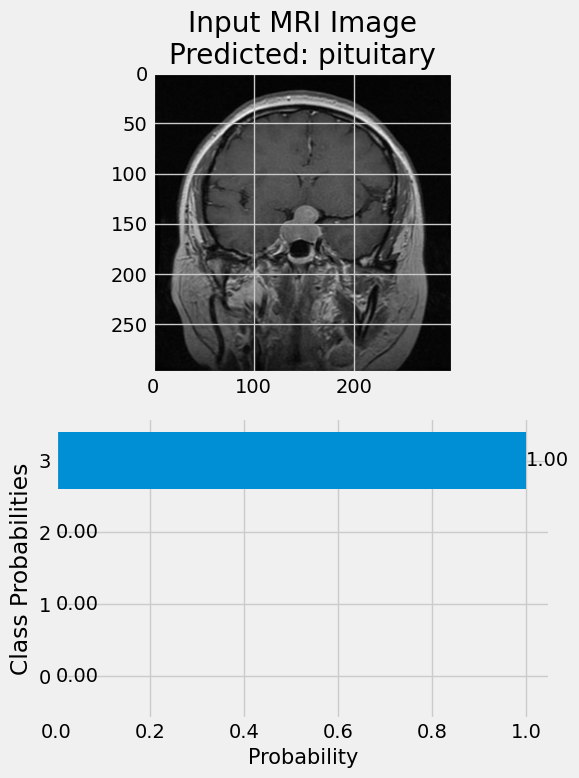


Predicted tumor type: pituitary


In [25]:
predict("/content/Testing/pituitary/Te-piTr_0001.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


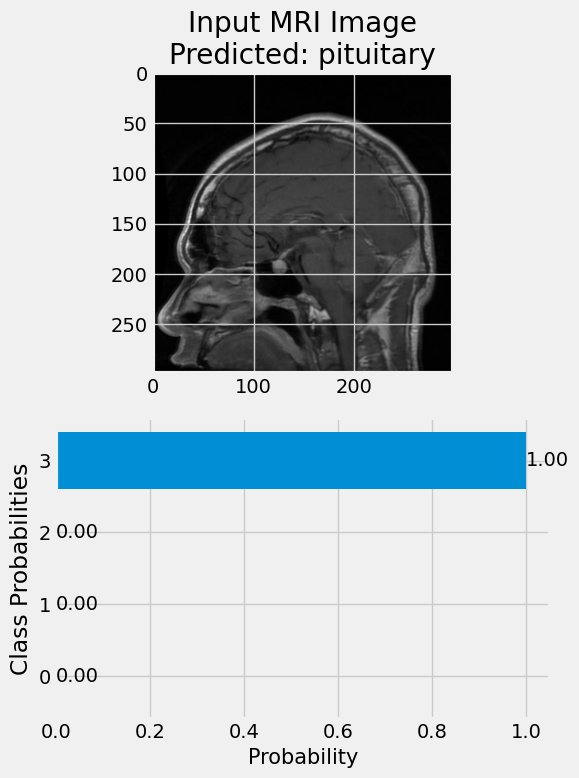


Predicted tumor type: pituitary


In [26]:
predict("/content/Testing/pituitary/Te-piTr_0006.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


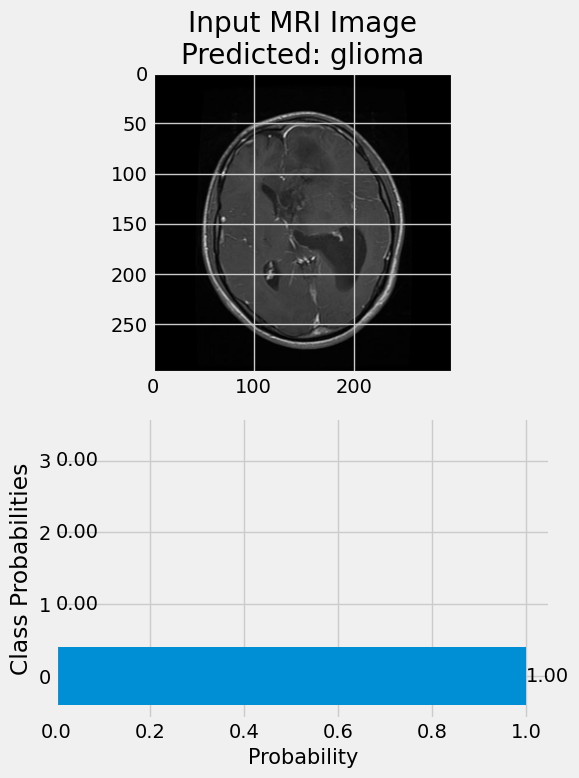


Predicted tumor type: glioma


In [27]:
predict("/content/Testing/glioma/Te-glTr_0009.jpg")

In [28]:
model.save_weights("xception_model.weights.h5")

In [29]:
# Transfer Learning training above this (Xception Model which is a type of CNN).
# --------------------
# No Transfer Learning below (training Convolutional Neural Network (CNN))

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [31]:
batch_size = 16 # 16,32,64,128 are commonly used

img_size = (224,224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)



tr_gen = image_generator.flow_from_dataframe(tr_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path", y_col="Class", batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [32]:
# Create Sequential model
cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3,3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

# Compile model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
cnn_hist = cnn_model.fit(tr_gen, epochs=8, validation_data=valid_gen)

Epoch 1/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9768 - loss: 0.1757 - precision_1: 0.9770 - recall_1: 0.9765 - val_accuracy: 0.9618 - val_loss: 0.2587 - val_precision_1: 0.9618 - val_recall_1: 0.9618
Epoch 2/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9763 - loss: 0.1750 - precision_1: 0.9777 - recall_1: 0.9753 - val_accuracy: 0.9527 - val_loss: 0.2618 - val_precision_1: 0.9527 - val_recall_1: 0.9527
Epoch 3/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9817 - loss: 0.1558 - precision_1: 0.9821 - recall_1: 0.9817 - val_accuracy: 0.9313 - val_loss: 0.3285 - val_precision_1: 0.9326 - val_recall_1: 0.9298
Epoch 4/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9789 - loss: 0.1566 - precision_1: 0.9792 - recall_1: 0.9788 - val_accuracy: 0.9527 - val_loss: 0.2990 - val_precision_1: 0.9527 - val_recall_1: 0.9527
Epoch 5/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9836 - loss: 0.1458 - precision_1: 0.9840 - recall_1: 0.9

In [53]:
print(cnn_hist.history.keys())

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


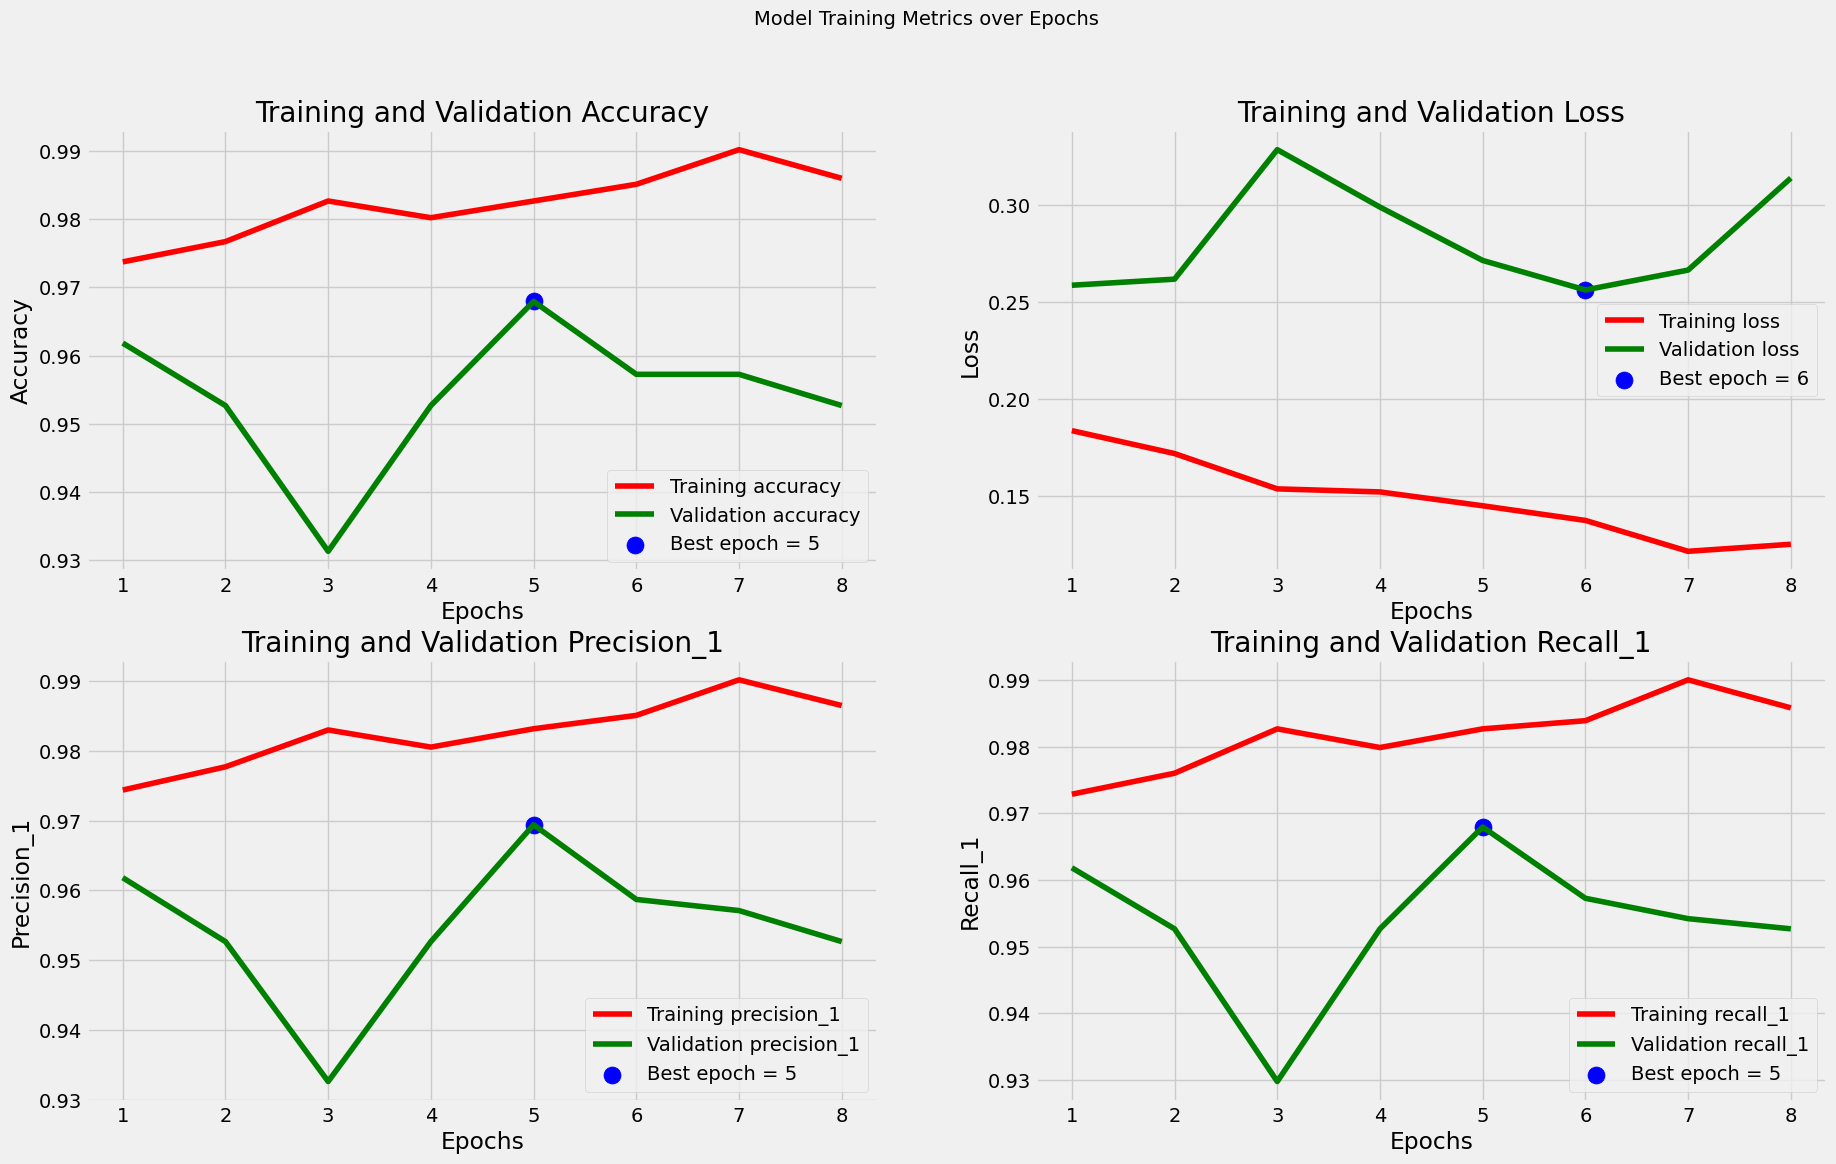

In [54]:
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: cnn_hist.history[m] for m in metrics}
val_metrics = {m: cnn_hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Model Training Metrics over Epochs", fontsize=14)
plt.show()

In [55]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.9963 - loss: 0.0967 - precision_1: 0.9963 - recall_1: 0.9963
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9478 - loss: 0.2656 - precision_1: 0.9478 - recall_1: 0.9478
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9717 - loss: 0.1590 - precision_1: 0.9717 - recall_1: 0.9717
Train Accuracy: 99.68%
Train Loss: 0.0967


Validation Accuracy: 94.66%
Validation Loss: 0.3035


Test Accuracy: 97.10%
Test Loss: 0.1665


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


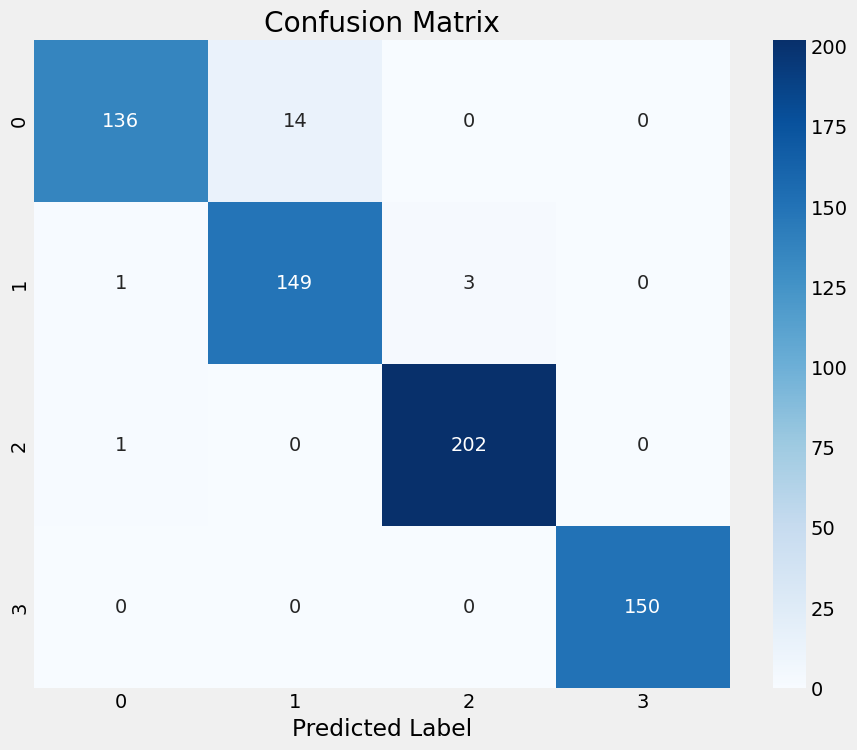

In [56]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Confusion matrix from scikit-learn
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.91      0.94       150
           1       0.91      0.97      0.94       153
           2       0.99      1.00      0.99       203
           3       1.00      1.00      1.00       150

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



In [58]:
cnn_model.save("cnn_model.h5")

# Streamlit Web App

In [59]:
! pip install streamlit pyngrok python-dotenv

In [60]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [61]:
ngrok_token = userdata.get("NGROK_AUTH_TOKEN")
ngrok.set_auth_token(ngrok_token)

In [62]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [63]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv

load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):

  prompt = f"""
  Context: You are an expert neurosurgeon interpreting a brain tumor MRI saliency map. The saliency map, produced by a deep learning model trained to classify brain tumors as glioma, meningioma, pituitary, or no tumor, highlights regions in light cyan that the model considered when making its prediction.

  Output: Provide an explanation in 4 sentences or fewer.

  Situation: The deep learning model classified the tumor as '{model_prediction}' with a confidence of {confidence * 100}%.

  Task:

  Explain what regions of the brain the model is focusing on, based on the saliency map, referring to the regions highlighted in light cyan.
  Provide possible reasons why the model made the prediction it did.
  Do not mention:
  "The saliency map highlights the regions the model is focusing on, which are in light cyan."
  The mechanism of the saliency map or its highlighting process.
  Action: Write a concise explanation adhering to the specified omissions.

  Let's think step by step about this. Verify step by step.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text

def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  gradients = cv2.resize(gradients, img_size)

  center = [gradients.shape[0] // 2, gradients.shape[1] // 2]
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0]) ** 2 + (y - center[1]) ** 2<= radius ** 2

  gradients = gradients * mask

  brain_gradients = gradients[mask]

  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())

  gradients[mask] = brain_gradients

  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  heatmap = cv2.resize(heatmap, img_size)

  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img

def load_xception_model(model_path):
  img_shape = (299,299,3)

  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling="max")

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy', Precision(), Recall()])

  model.load_weights(model_path)

  return model

st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:

  # Allow user to select which model to use for analysis

  selected_model = st.radio(
      "Select Model",
      ["Transfer Learning - Xception", "Custom CNN"]
  )

  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299,299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224,224)

  labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)

  with col1:
    st.image(uploaded_file, caption="Uploaded Image", use_container_width=True)

  with col2:
    st.image(saliency_map, caption="Saliency Map", use_container_width=True)

  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()

  # TODO: be creative with this
  result_container.markdown(
      f"""
      <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
        <div style="display: flex; justify-content: space-between; align-items: cetner;">
          <div style="flex: 1; text-align: center;">
            <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
            <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
              {result}
            </p>
          </div>
          <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
          <div style="flex: 1; text-align: center;">
            <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
            <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
              {prediction[0][class_index]:.4%}
            </p>
          </div>
        </div>
      </div>
      """,
      unsafe_allow_html=True
  )

  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange='reversed')
  )

  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4f}',
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  st.plotly_chart(fig)


  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)


Overwriting app.py


In [64]:
thread = Thread(target=run_streamlit)
thread.start()

In [65]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://1609-34-125-191-89.ngrok-free.app" -> "http://localhost:8501"


In [66]:
# tunnels = ngrok.get_tunnels()
# for tunnel in tunnels:
#   print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
#   ngrok.disconnect(tunnel.public_url)

In [67]:
# from tensorflow.keras.backend import clear_session
# clear_session()